In [56]:
%pip install matplotlib pandas numpy seaborn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [58]:
df = pd.read_csv('increase.csv')
df

,Model,Vanilla (baseline),Translation,TDD,CI+TDD
0,Llama 3.2 3B,0.20,0.16,0.48,0.42
1,Llama 3.2 11B,0.10,0.12,0.52,0.55
2,Llama 3.2 90B,0.35,0.34,0.63,0.70
3,Llama 4 Scout 17B,0.17,0.46,0.70,0.72
4,Llama 4 Maverick 17B,0.42,0.55,0.76,0.81
5,GPT OSS 20B,0.51,0.47,0.75,0.83
6,GPT OSS 120B,0.54,0.55,0.79,0.85


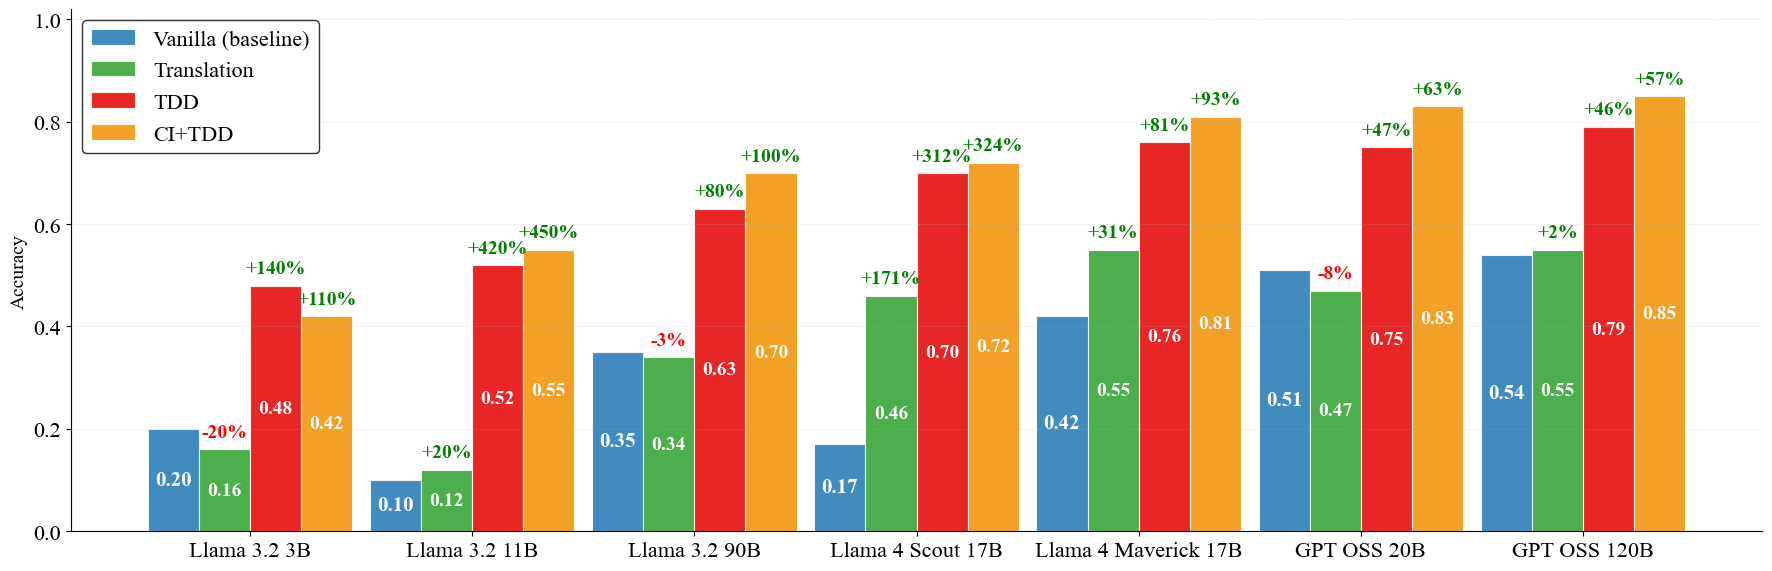

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate percentage changes compared to baseline
methods = ['Translation', 'TDD', 'CI+TDD']
baseline = 'Vanilla (baseline)'

# Create a new dataframe for percentage changes
pct_change_df = df.copy()
for method in methods:
    pct_change_df[f'{method}_pct'] = ((df[method] - df[baseline]) / df[baseline] * 100).round(0)

# Academic-style plotting
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],
    'font.size': 16,
    'axes.linewidth': 0.8,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

# Professional palette
colors = [
    '#1f77b4',  # Charcoal gray for baseline
    '#2ca02c',  # Professional blue for Translation
    '#e60000',  # Deep magenta for TDD
    '#F18F01'   # Orange for CI+TDD
]

fig, ax = plt.subplots(figsize=(18, 6))

x = np.arange(len(df))
width = 0.23  # wider bars

# Baseline bars
bars_baseline = ax.bar(x - 1.5*width, df[baseline], width, label=baseline, 
                      color=colors[0], alpha=0.85, edgecolor='white', linewidth=0.8)

# Plot other methods
for i, method in enumerate(methods):
    bars = ax.bar(x + (i-0.5)*width, df[method], width, label=method, 
                  color=colors[i+1], alpha=0.85, edgecolor='white', linewidth=0.8)
    
    for j, bar in enumerate(bars):
        height = bar.get_height()
        pct_change = pct_change_df[f'{method}_pct'].iloc[j]
        arrow = "+" if pct_change > 0 else ("-" if pct_change < 0 else "→")
        
        # Dynamic color for percentage change
        pct_color = "green" if pct_change > 0 else ("red" if pct_change < 0 else "black")
        
        # Percentage above bar
        ax.annotate(f'{arrow}{abs(pct_change):.0f}%',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 6),
                   textcoords="offset points",
                   ha='center', va='bottom',
                   fontsize=14, fontweight='bold',
                   color=pct_color)
        
        # Value inside bar
        ax.annotate(f'{height:.2f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                   ha='center', va='center',
                   fontsize=14, fontweight='bold',
                   color='white')

# Baseline annotations inside
for bar in bars_baseline:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
               xy=(bar.get_x() + bar.get_width() / 2, height / 2),
               ha='center', va='center',
               fontsize=15, fontweight='bold',
               color='white')

# Labels & formatting
# ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
# ax.set_title('Model Accuracy Comparison with Percentage Changes from Baseline', 
            #  fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df['Model'], rotation=0)
ax.legend(frameon=True, edgecolor='black', facecolor='white', loc='upper left')
ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=0.5)
ax.set_ylim(0, max(df.select_dtypes(include=[np.number]).max()) * 1.2)

plt.tight_layout()

plt.savefig('increase.png', dpi=300, bbox_inches='tight')

plt.show()
